**Abstract**

Parkinson's disease is a progressive central nervous system condition that affects movement and causes tremors and stiffness.

It has 5 stages to it and an estimated seven to 10 million people worldwide have Parkinson’s disease. 

This is chronic and still has no cure. It is a neurodegenerative disease that affects the neurons in the brain that contain dopamine.



We’ll load the data, get the features and labels, scale the features, then split the dataset, build a model and use different algorithms , and then calculate the accuracy of our model.

In [17]:
#Make necessary imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Details About the Data Set

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals. 

The original study published the
feature extraction methods for general voice disorders.

Number of Instances: 195

Area: Life

Attribute Characteristics: Real

Number of Attributes: 23

Date Donated: 2008-06-26

Associated Tasks: Classification

Missing Values? N/A

File Size: 39.7 KB



In [18]:
# Load the Dataset
df=pd.read_csv('parkinsons.data')
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [19]:
df.shape

(195, 24)

Attribute Information:

Matrix column entries (attributes):

***name*** - ASCII subject name and recording number

***MDVP:Fo(Hz) ***- Average vocal fundamental frequency

***MDVP:Fhi(Hz)*** - Maximum vocal fundamental frequency

***MDVP:Flo(Hz)*** - Minimum vocal fundamental frequency

***MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP*** - Several measures of variation in fundamental frequency

***MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA*** - Several measures of variation in amplitude

***NHR,HNR ***- Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

***RPDE,D2*** - Two nonlinear dynamical complexity measures

***DFA*** - Signal fractal scaling exponent

***spread1,spread2,PPE*** - Three nonlinear measures of fundamental frequency variation

Please refer to the below link for more details on Computing the fundamental frequency variation spectrum in conversational spoken dialog system.

http://www.cs.cmu.edu/~kornel/pubs/003228.pdf

**Analyse the effect of feature type selection **

The task of Feature selection was also done using minimum-Redundancy and Maximum-Relevance (mRMR) andRecursive Feature Elimination (RFE) techniques

In this work, various machine learning models, including Logistic Regression, Naive Bayes, KNN,Random Forest, Decision Tree, SVM, MLP, and XGBoost, have been employed and explored for PD detection purpose.

In [20]:
#find null Values in the data set

df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [21]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [40]:
# Finding Unique values in the columns

for i in df.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df[i].tolist()))
    print()

************************************************* name ************************************************************

{'phon_R01_S02_5', 'phon_R01_S01_2', 'phon_R01_S17_3', 'phon_R01_S22_1', 'phon_R01_S35_3', 'phon_R01_S22_2', 'phon_R01_S10_5', 'phon_R01_S21_3', 'phon_R01_S10_1', 'phon_R01_S42_1', 'phon_R01_S17_1', 'phon_R01_S21_6', 'phon_R01_S04_5', 'phon_R01_S24_3', 'phon_R01_S35_4', 'phon_R01_S37_6', 'phon_R01_S05_6', 'phon_R01_S21_4', 'phon_R01_S25_4', 'phon_R01_S01_4', 'phon_R01_S06_1', 'phon_R01_S06_3', 'phon_R01_S34_6', 'phon_R01_S08_1', 'phon_R01_S18_4', 'phon_R01_S32_6', 'phon_R01_S07_5', 'phon_R01_S02_6', 'phon_R01_S26_4', 'phon_R01_S31_2', 'phon_R01_S33_4', 'phon_R01_S26_6', 'phon_R01_S27_1', 'phon_R01_S08_2', 'phon_R01_S07_2', 'phon_R01_S01_6', 'phon_R01_S21_5', 'phon_R01_S07_3', 'phon_R01_S33_5', 'phon_R01_S18_5', 'phon_R01_S26_2', 'phon_R01_S34_2', 'phon_R01_S31_1', 'phon_R01_S42_6', 'phon_R01_S37_4', 'phon_R01_S35_5', 'phon_R01_S50_6', 'phon_R01_S04_1', 'phon_R01_S06_2', 

IndexError: Requested axis not found in manager

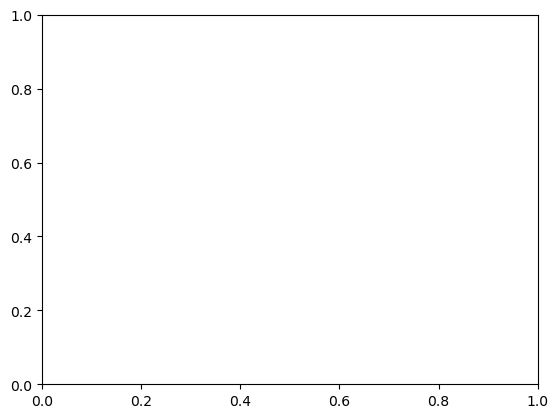

In [ ]:
#Check Label Imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp=df["status"].value_counts()
temp_df= pd.DataFrame({'status': temp.index,'values': temp.values})
print(sns.barplot(x='status', y="values", data=temp_df))

In [42]:
sns.pairplot(df)

IndexError: Requested axis not found in manager

Error in callback <function flush_figures at 0x0000011ABDBBB9C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

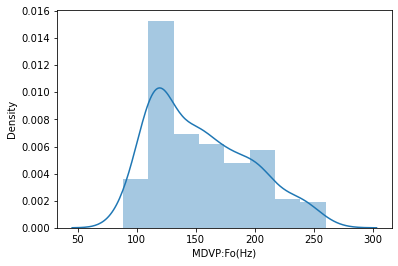

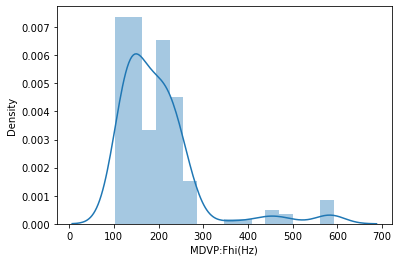

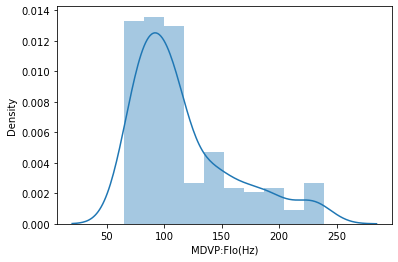

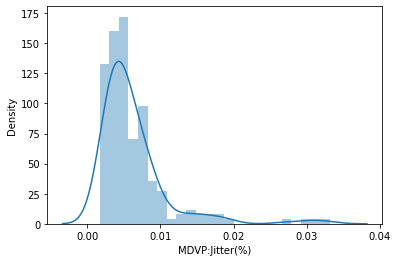

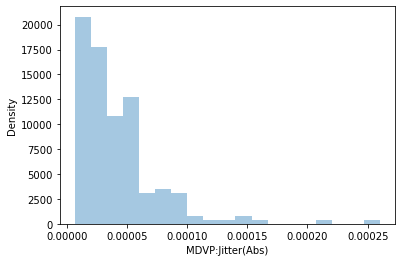

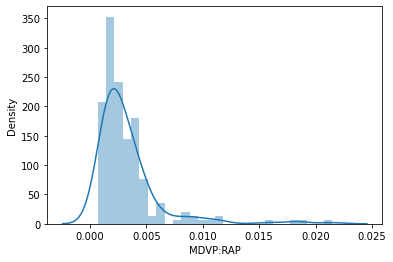

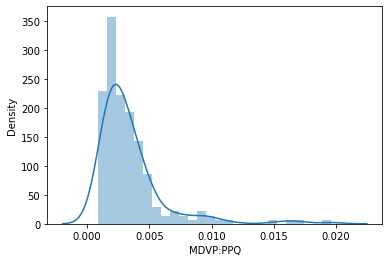

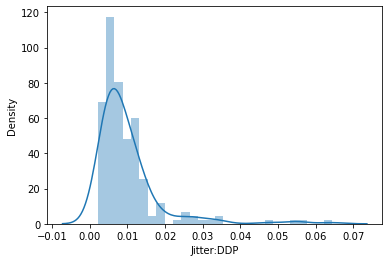

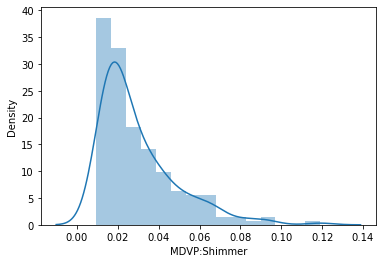

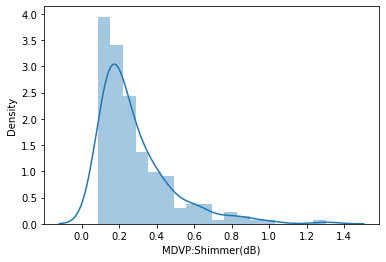

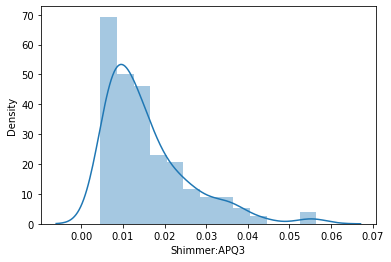

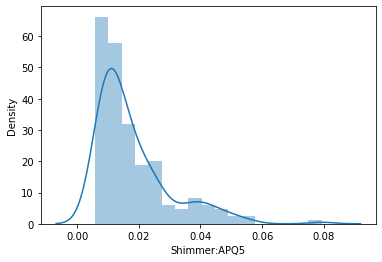

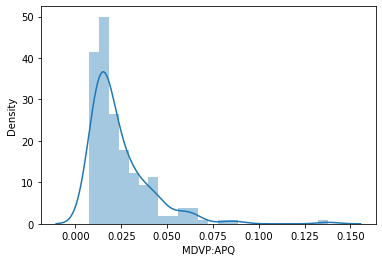

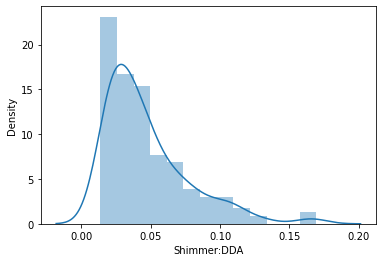

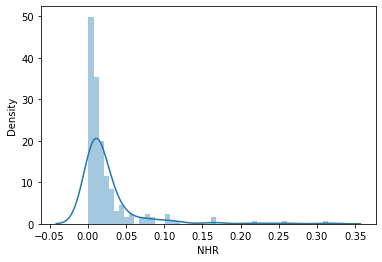

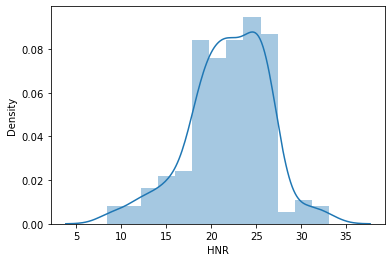

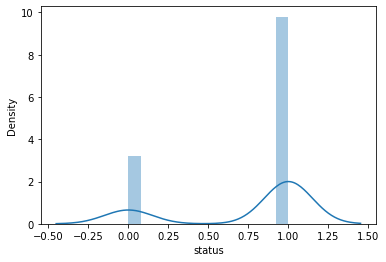

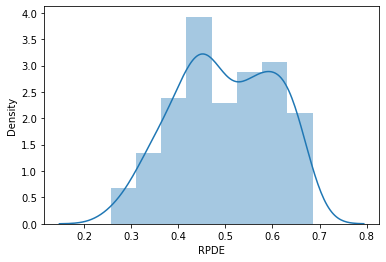

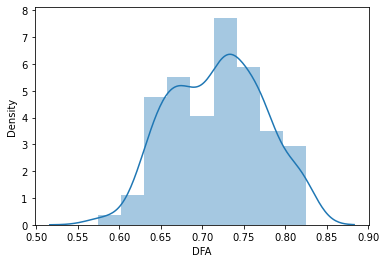

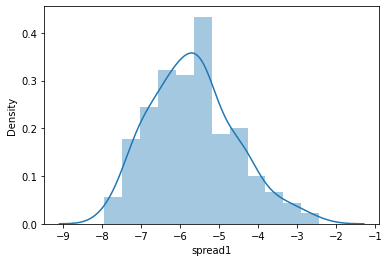

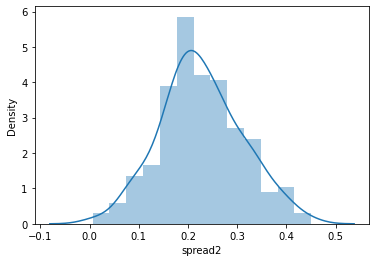

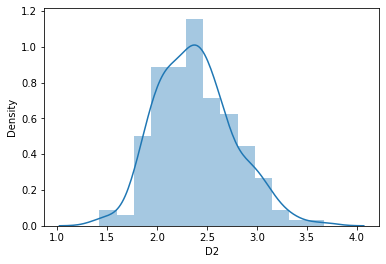

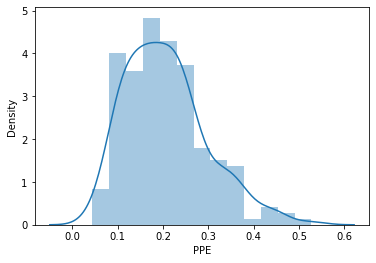

In [ ]:
# Find the distribution of data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

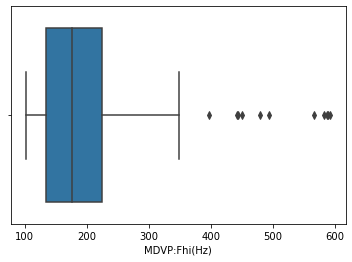

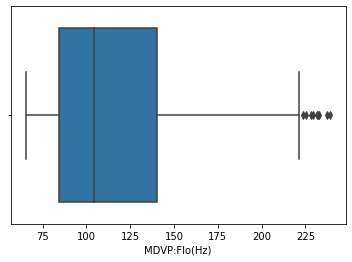

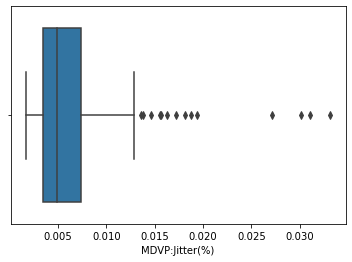

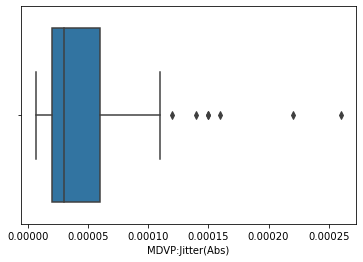

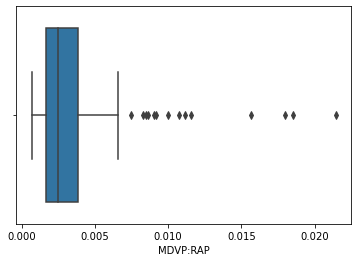

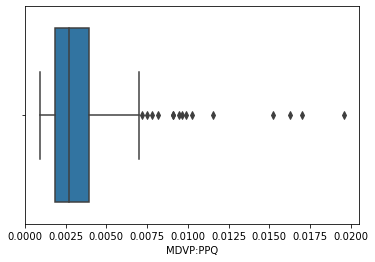

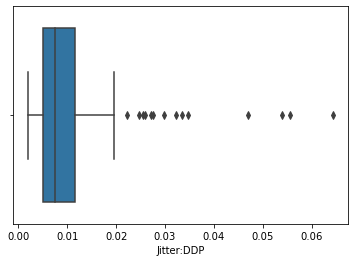

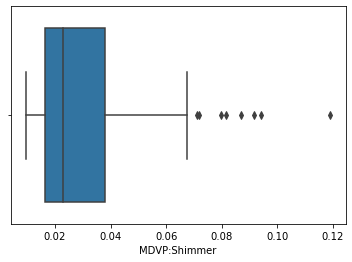

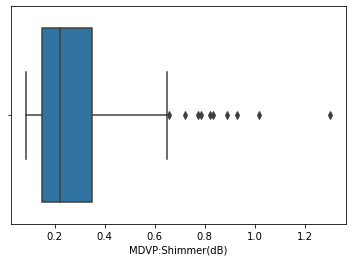

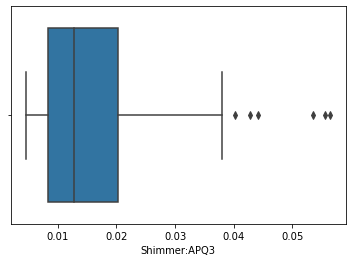

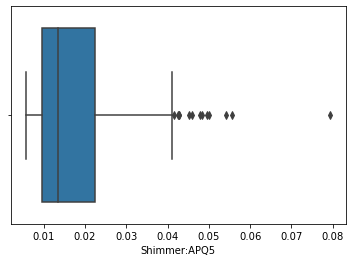

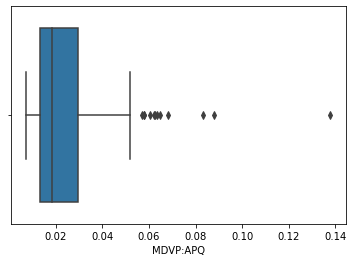

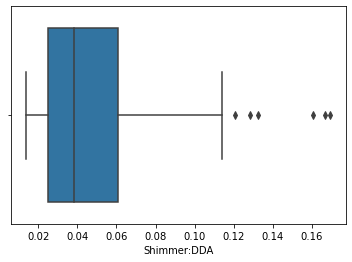

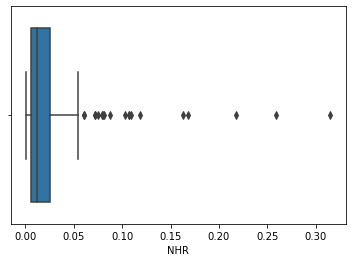

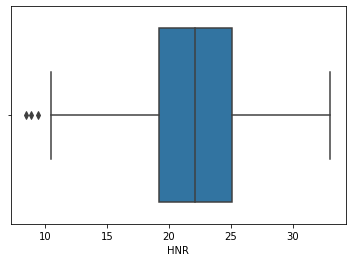

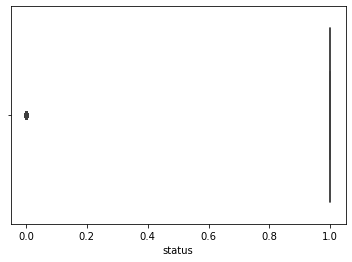

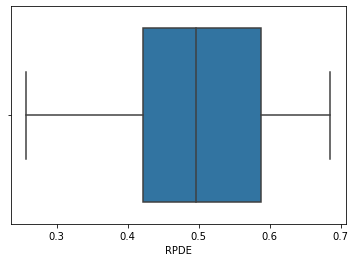

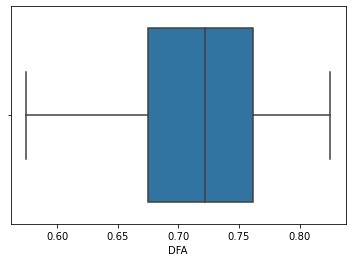

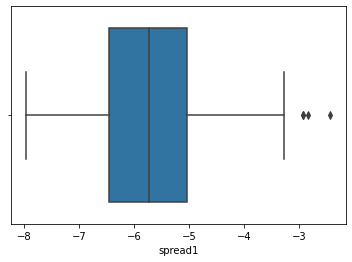

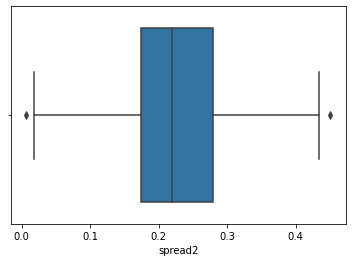

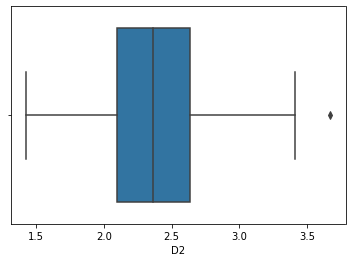

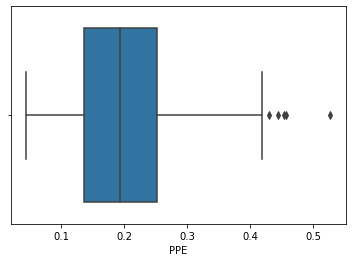

In [ ]:
# Find the distribution of data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

<AxesSubplot:>

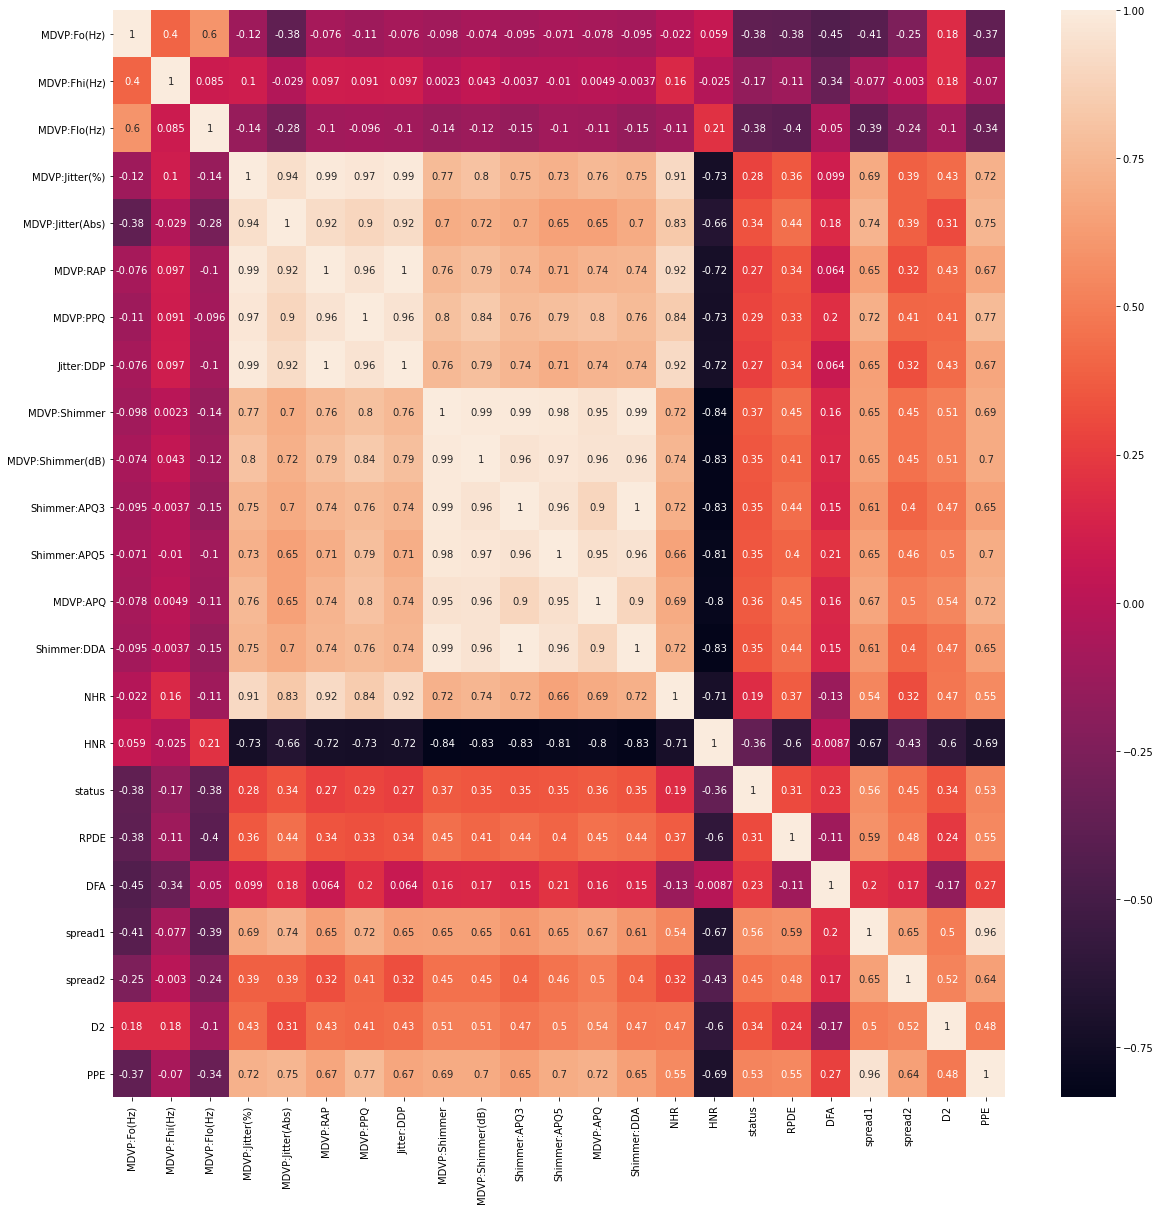

In [ ]:
# Finding Correlations

plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
# Lets make some final changes to the data 

# Seperate independent and dependent variables and drop the ID column
x=df.drop(["status","name"],axis=1)
y=df["status"]

In [ ]:
# Lets detect the label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({1: 147, 0: 48})


In [ ]:
# Lets balance the labels

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [ ]:
#Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. 
#The MinMaxScaler transforms features by scaling them to a given range.
#The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.
#Scale the features to between -1 and 1

# Scaling is important in the algorithms such as support vector machines (SVM) and k-nearest neighbors (KNN) where distance 
# between the data points is important.

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

The most important use of PCA is to represent a multivariate data table as smaller set of variables (summary indices) in order to observe trends, jumps, clusters and outliers.

This overview may uncover the relationships between observations and variables, and among the variables.

In [ ]:
# Applying Feature Engineering

# Applying PCA 

# The code below has .95 for the number of components parameter. 
# It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

# Thus we need 8 columns to keep 95% of the variance

(294, 22)
(294, 8)


Now split the Dataset in to Train and Test and make use of algorithms such as logistic regression, decision Tree, random forest, Svm,Gaussian Naive Bayes, Bernoulli Naive Bayes, KNN. and study the Accuracy of each model and predict the disease.

In [ ]:
#Now,split the dataset into training and testing sets keeping 20% of the data for testing.
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)

                       Method Used  Accuracy
0              Logistic Regression  0.847458
1                     Decison Tree  0.966102
2  Random Forest(information gain)  0.983051
3           Random Forest(Entropy)  0.983051
4                              SVM  0.966102
5                              KNN  0.983051
6                              gnb  0.898305
7                              bnb  0.915254
8                voting classifier  0.898305
AxesSubplot(0.125,0.125;0.775x0.755)


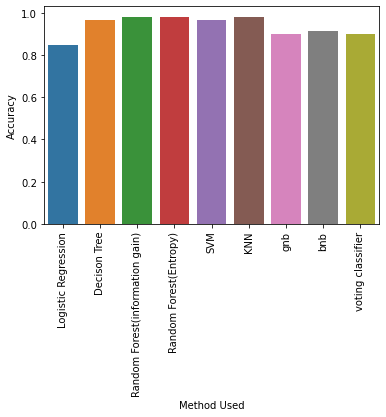

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

list_met=[]
list_accuracy=[]

# Applying all the algorithms

# Apply Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train, y_train)
#Preciction
y_pred = classifier.predict(x_test)
#Accuracy
accuracy_LR= accuracy_score(y_test, y_pred)


# Apply Decison Tree

from sklearn.tree import DecisionTreeClassifier


classifier2 = DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train, y_train)
#Preciction
y_pred2 = classifier2.predict(x_test)
#Accuracy
accuracy_DT= accuracy_score(y_test, y_pred2)

# Apply Random Forest criteria=information gain

from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train, y_train)
#Preciction
y_pred3 = classifier3.predict(x_test)
#Accuracy
accuracy_RFI= accuracy_score(y_test, y_pred3)

# Apply Random Forest criteria=entropy

from sklearn.ensemble import RandomForestClassifier

classifier4 = RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train, y_train)
#Preciction
y_pred4 = classifier4.predict(x_test)
#Accuracy
accuracy_RFE= accuracy_score(y_test, y_pred4)

# similarly apply SVM

from sklearn.svm import SVC

model_svm = SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)
#Preciction
y_pred5 = model_svm.predict(x_test)
#Accuracy
accuracy_svc= accuracy_score(y_test, y_pred5)

# Apply KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
# Predicting Test Set N=3
pred_knn3= model_knn3.predict(x_test)
#Accuracy
accuracy_SVM = accuracy_score(y_test, pred_knn3)

#Apply Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)
# Predicting Test Set
pred_gnb = gnb.predict(x_test)
#accuracy
accuracy_GNB = accuracy_score(y_test, pred_gnb)

#Apply Bernoulli Naive Bayes

from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
bnb=model.fit(x_train, y_train)
# Predicting Test Set
pred_bnb = model.predict(x_test)
#accuracy
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# Combining all the above using voting classifier

from sklearn.ensemble import VotingClassifier

evc=VotingClassifier(estimators=[('lr', lr), ('rfi', rfi),('rfe', rfe), ('DT', dt),
                                 ('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',
                                 flatten_transform=True)

model_evc=evc.fit(x_train, y_train)
# Predicting Test Set
pred_evc = evc.predict(x_test)
#accuracy
accuracy_evc = accuracy_score(y_test, pred_gnb)

list1=['Logistic Regression','Decison Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','voting classifier']

list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy': list2})
print(df_Accuracy)

chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)



In [ ]:
#Initialize an XGBClassifier and train the model.
#This classifies using eXtreme Gradient Boosting- using gradient boosting algorithms for modern data science problems. 
#It falls under the category of Ensemble Learning in ML, 
#where we train and predict using many models to produce one superior output.
#Train the model
model_xg=XGBClassifier()
model_xg.fit(x_train,y_train)

[20:32:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Finally, generate y_pred (predicted values for x_test) and calculate the accuracy for the model. 
#Print it out.
#Calculate the accuracy
y_pred=model_xg.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

100.0


Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_xg.predict(x_test))

The F1 score can be interpreted as a weighted average of the precision and recall.

where an F1 score reaches its best value at 1 and worst score at 0.

The relative contribution of precision and recall to the F1 score are equal. 

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, model_xg.predict(x_test), average='binary')

1.0

In [ ]:
"""
Confusion matrices are used to visualize important predictive analytics like recall, specificity, accuracy, and precision. 
Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, 
True Negatives and False Negatives.
"""

'\nConfusion matrices are used to visualize important predictive analytics like recall, specificity, accuracy, and precision. \nConfusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, \nTrue Negatives and False Negatives.\n'

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
print(classification_report(y_test, model_xg.predict(x_test)))
print('Confusion Matrix:')
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        35

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Confusion Matrix:
[[24  0]
 [ 0 35]]


In [ ]:
for i in list3:
    print("****************************************** ",i," **********************************************")
    print(classification_report(y_test, i.predict(x_test)))
    print('Confusion Matrix:')
    print(cm)
    print()

******************************************  LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')  **********************************************
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.83      0.87        35

    accuracy                           0.85        59
   macro avg       0.84      0.85      0.84        59
weighted avg       0.85      0.85      0.85        59

Confusion Matrix:
[[24  0]
 [ 0 35]]

******************************************  DecisionTreeClassifier(random_state=14)  **********************************************
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.94      0.97        35

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Confusion Matrix:
[[24 

In [ ]:
# Visualizing performance with ROC

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

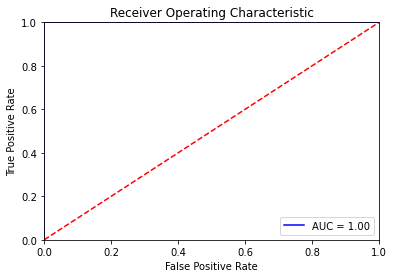

In [ ]:
plot_roc(model_xg, x_test, y_test)


------------------ROC FOR  Logistic Regression  + PCA ---------------------------


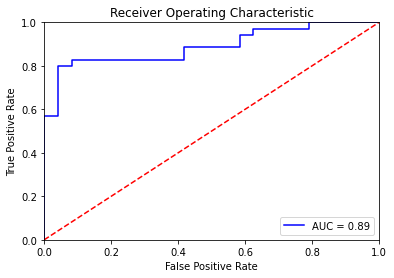



------------------ROC FOR  Decison Tree  + PCA ---------------------------


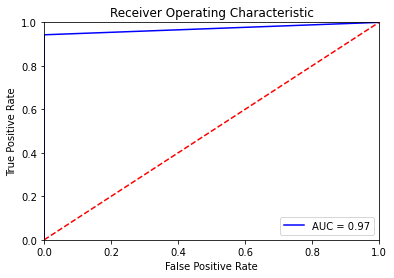



------------------ROC FOR  Random Forest(information gain)  + PCA ---------------------------


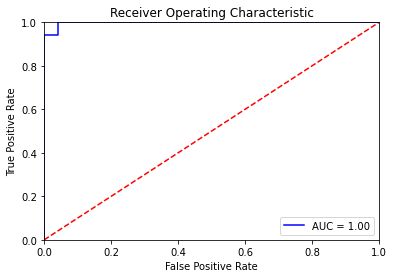



------------------ROC FOR  Random Forest(Entropy)  + PCA ---------------------------


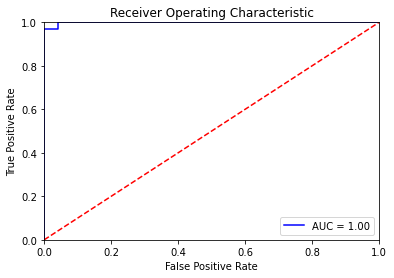



------------------ROC FOR  SVM  + PCA ---------------------------
roc not valid

------------------ROC FOR  KNN  + PCA ---------------------------


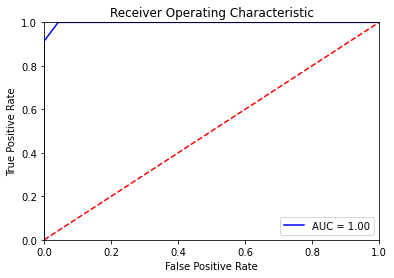



------------------ROC FOR  gnb  + PCA ---------------------------


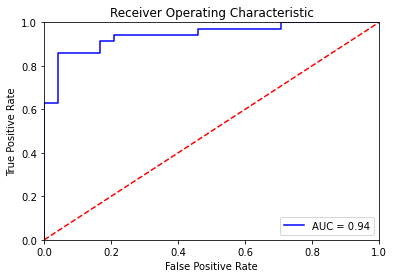



------------------ROC FOR  bnb  + PCA ---------------------------


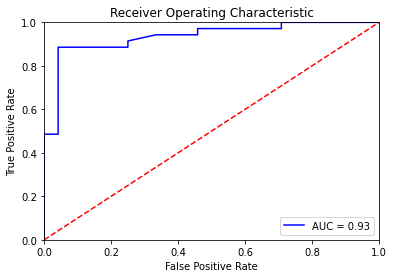

In [ ]:
for i in range(0,len(list3)):
    try:
        print()
        print("------------------ROC FOR ",list1[i]," + PCA ---------------------------")
        plot_roc(list3[i], x_test, np.array(y_test))
        print()
    except:
        print("roc not valid")